In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
siemens_colors_RGB = {
    "Petrol": (0, 153, 153),
    "Snow": (255, 255, 255),
    "Stone": (135, 155, 170),
    "Stone35": (190, 205, 215),
    "Sand": (170, 170, 150),
    "Sand35":  (215, 215, 205),
    "NaturalYellowDark": (235, 120, 10),
    "NaturalYellowLight": (255, 185, 0),
    "NaturalRedDark": (100, 25, 70),
    "NaturalRedLight": (175, 35, 95),
    "NaturalBlueDark": (0, 100, 135),
    "NaturalBlueLight": (85, 160, 185),
    "NaturalGreenDark": (100, 125, 45),
    "NaturalGreenLight": (170, 180, 20),
    "NaturalGrayDark": (15, 25, 35),
    "NaturalGrayLight": (80, 90, 100),
    "FunctionalRed": (153, 0, 0),
    "FunctionalGray": (238, 238, 238),
    "FunctionalBlack": (0, 0, 0)
}
siemens_colors_hex = {
    key: "#%02x%02x%02x" % siemens_colors_RGB[key] for key in siemens_colors_RGB.keys()
}

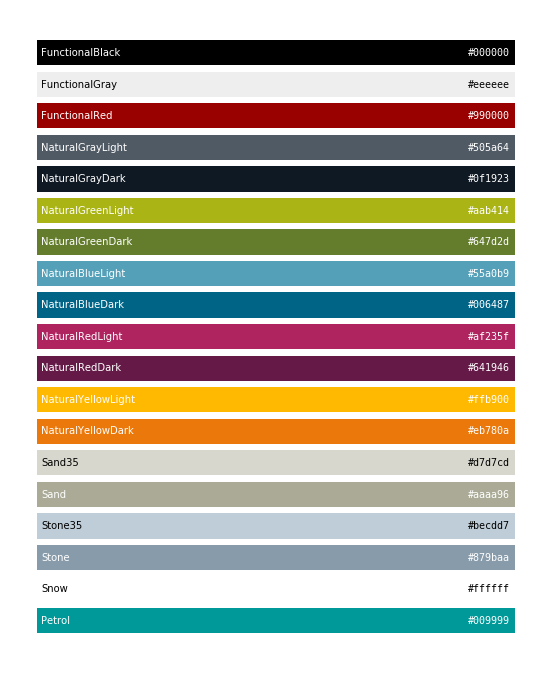

In [3]:
def rgb_font_color(rgb):
    l = (np.array(rgb) * np.array([0.299, 0.587, 0.114])).sum()
    font_color = "#000000" if l > 186 else "#ffffff"
    return font_color

num_color = len(siemens_colors_hex)
fig, ax = plt.subplots(figsize=(9, 12))
ax.barh(np.arange(num_color), np.ones(num_color), color=siemens_colors_hex.values())
for idx, item in enumerate(siemens_colors_RGB.items()):
    ax.text(0.01, idx, item[0], va='center', color=rgb_font_color(item[1]))
    ax.text(0.99, idx, siemens_colors_hex[item[0]], ha='right', va='center', 
            color=rgb_font_color(item[1]), family="monospace")
ax.set_axis_off()
plt.show()

In [4]:
import pandas as pd
filename = "siemens_ase.xlsx"
df = pd.read_excel(filename)

df.head()

,a,name,hue,type,hex,R,G,B
0,255 255 255 ffffff,Snow,Snow,prime,ffffff,255,255,255
1,45 55 60 2d373c,Stone,Stone,shade,2d373c,45,55,60
2,dark 60 70 75 3c464b,Stone dark,Stone,prime,3c464b,60,70,75
3,85 95 105 555f69,Stone,Stone,shade,555f69,85,95,105
4,105 120 130 697882,Stone,Stone,shade,697882,105,120,130


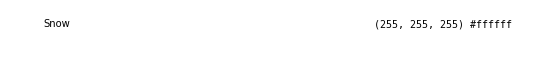

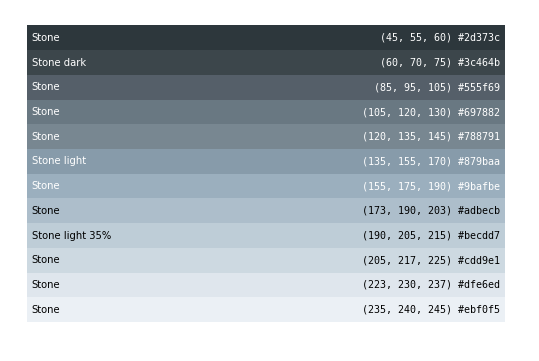

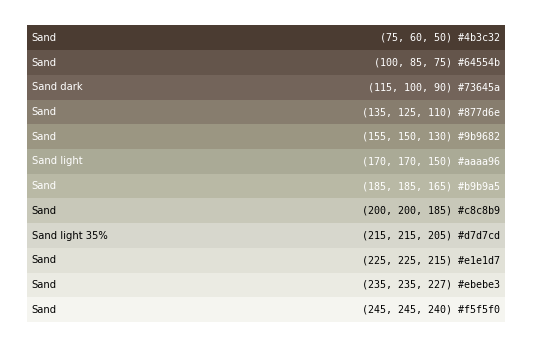

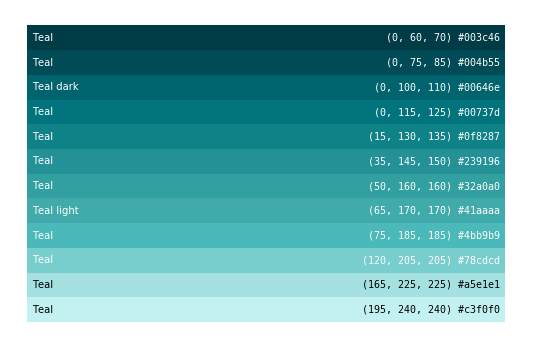

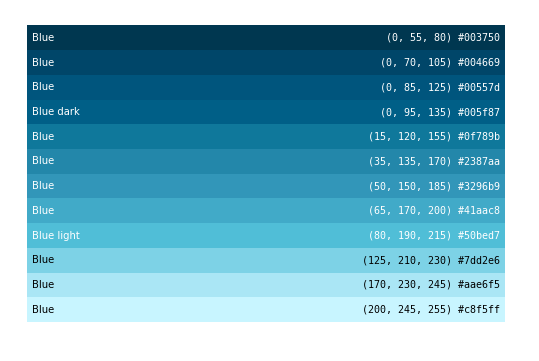

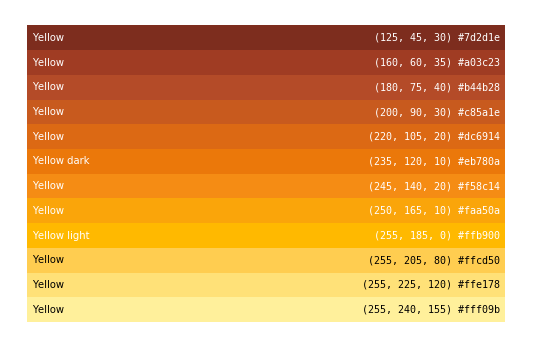

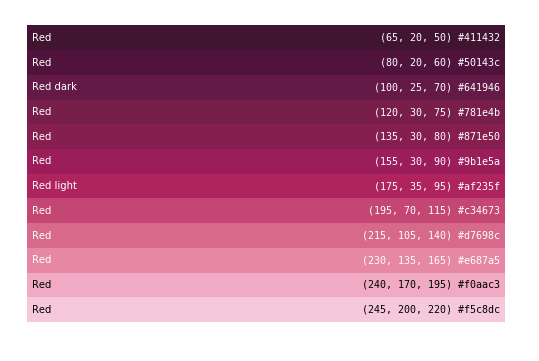

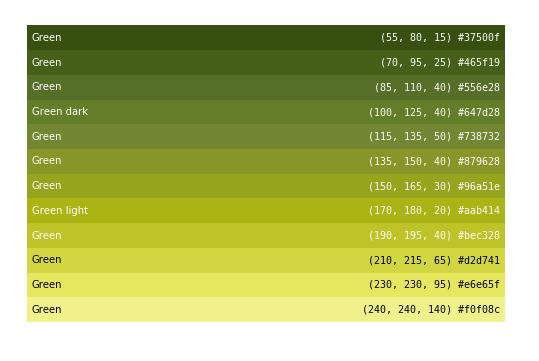

In [5]:
for hue in df['hue'].unique():
    _df = df[df['hue']==hue]
    fig, ax = plt.subplots(figsize=(9, len(_df)*0.5))
    for row in range(len(_df)):
        s = _df.iloc[row, :]
        hex = "#" + s['hex']
        rgb = (s['R'], s['G'], s['B'])
        ax.barh(row, 1, 1, color=hex)
        ax.text(0.01, row, s['name'], va='center', color=rgb_font_color(rgb))
        ax.text(0.99, row, "({}, {}, {}) {}".format(*rgb, hex), 
                ha='right', va='center', color=rgb_font_color(rgb), family="monospace")
    ax.invert_yaxis()
    ax.set_axis_off()

plt.show()

In [6]:
lines = ["  {}  {}  {}  {}\n".format(*row[['R', 'G', 'B', 'name']]) for (idx, row) in df.iterrows()]

filename = 'siemens.gpl'
with open(filename, 'w') as f:
    
    f.write("GIMP Palette\n")
    f.write("Name: Siemens Colors\n")
    f.write("# generated by PaletteGen.py\n")

    for line in lines:
        f.write(line)
        
f.close()

In [8]:
for hue in df['hue'].unique():
    _df = df[df['hue']==hue]
    print(f"{hue.upper()} = {['#'+hex for hex in _df['hex']]},")

SNOW = ['#ffffff'],
STONE = ['#2d373c', '#3c464b', '#555f69', '#697882', '#788791', '#879baa', '#9bafbe', '#adbecb', '#becdd7', '#cdd9e1', '#dfe6ed', '#ebf0f5'],
SAND = ['#4b3c32', '#64554b', '#73645a', '#877d6e', '#9b9682', '#aaaa96', '#b9b9a5', '#c8c8b9', '#d7d7cd', '#e1e1d7', '#ebebe3', '#f5f5f0'],
TEAL = ['#003c46', '#004b55', '#00646e', '#00737d', '#0f8287', '#239196', '#32a0a0', '#41aaaa', '#4bb9b9', '#78cdcd', '#a5e1e1', '#c3f0f0'],
BLUE = ['#003750', '#004669', '#00557d', '#005f87', '#0f789b', '#2387aa', '#3296b9', '#41aac8', '#50bed7', '#7dd2e6', '#aae6f5', '#c8f5ff'],
YELLOW = ['#7d2d1e', '#a03c23', '#b44b28', '#c85a1e', '#dc6914', '#eb780a', '#f58c14', '#faa50a', '#ffb900', '#ffcd50', '#ffe178', '#fff09b'],
RED = ['#411432', '#50143c', '#641946', '#781e4b', '#871e50', '#9b1e5a', '#af235f', '#c34673', '#d7698c', '#e687a5', '#f0aac3', '#f5c8dc'],
GREEN = ['#37500f', '#465f19', '#556e28', '#647d28', '#738732', '#879628', '#96a51e', '#aab414', '#bec328', '#d2d741', '#e6e65f', '#

In [9]:
_df = df[(df.type == "prime") | (df.type == "accent") ]
names = _df.name.str.replace("%", "").str.replace(" ", "_")

for name, hex in zip(names, _df.hex):
    print(f'{name.upper()} = "#{hex}",')


SNOW = "#ffffff",
STONE_DARK = "#3c464b",
STONE_LIGHT = "#879baa",
STONE_LIGHT_35 = "#becdd7",
SAND_DARK = "#73645a",
SAND_LIGHT = "#aaaa96",
SAND_LIGHT_35 = "#d7d7cd",
TEAL_DARK = "#00646e",
TEAL_LIGHT = "#41aaaa",
BLUE_DARK = "#005f87",
BLUE_LIGHT = "#50bed7",
YELLOW_DARK = "#eb780a",
YELLOW_LIGHT = "#ffb900",
RED_DARK = "#641946",
RED_LIGHT = "#af235f",
GREEN_DARK = "#647d28",
GREEN_LIGHT = "#aab414",
